Predicting exam score based on hours studied




In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Student_Marks.csv')
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [ ]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [ ]:
df.shape

(100, 3)

In [ ]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


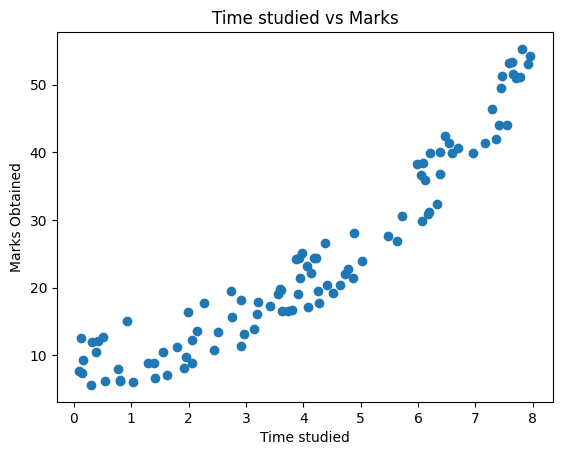

In [ ]:
plt.scatter(df['time_study'],df['Marks'])
plt.xlabel('Time studied')
plt.ylabel('Marks Obtained')
plt.title('Time studied vs Marks')
plt.show()

In [ ]:
#Divide dataset into independent and dependent features
X = df[['time_study']]
Y = df['Marks']

In [ ]:
X, Y

(    time_study
 0        4.508
 1        0.096
 2        3.133
 3        7.909
 4        7.811
 ..         ...
 95       3.561
 96       0.301
 97       7.163
 98       0.309
 99       6.335
 
 [100 rows x 1 columns],
 0     19.202
 1      7.734
 2     13.811
 3     53.018
 4     55.299
        ...  
 95    19.128
 96     5.609
 97    41.444
 98    12.027
 99    32.357
 Name: Marks, Length: 100, dtype: float64)

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((80, 1), (20, 1), (80,), (20,))

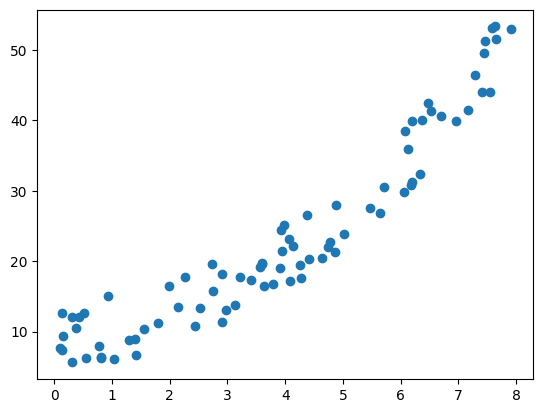

In [ ]:
plt.scatter(X_train, Y_train)

In [ ]:
#Train the model using Simple Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model

LinearRegression()

In [ ]:
model.fit(X_train, Y_train)
model

LinearRegression()

In [ ]:
print("The slope or coefficient of weight is: ", model.coef_)
print("The intercept of the line is: ", model.intercept_)

The slope or coefficient of weight is:  [5.35532153]
The intercept of the line is:  2.5155655058073734


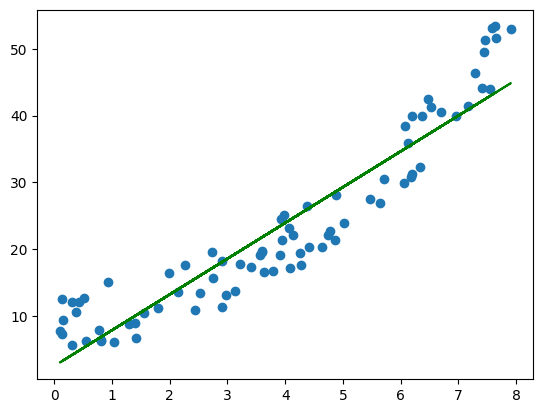

In [ ]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, model.predict(X_train), 'g')

In [ ]:
Y_pred_test = model.predict(X_test)

In [ ]:
Y_pred_test, Y_test

(array([19.63652844, 34.90990545, 22.52304675, 13.55288318, 12.97986378,
        44.15319041, 13.49932997, 45.12785893, 41.89324473, 26.65735497,
        43.81044983, 23.2085279 , 11.23938428, 37.82855568, 24.91152015,
        44.34598199, 36.67716155, 34.56716487, 25.10431172, 12.81384881]),
 83    16.106
 53    36.653
 70    16.606
 45     8.924
 44     9.742
 39    51.142
 22    12.209
 80    54.321
 10    42.036
 0     19.202
 18    50.986
 30    24.172
 73     7.014
 33    39.965
 90    24.394
 4     55.299
 76    36.746
 77    38.278
 12    24.318
 31     8.100
 Name: Marks, dtype: float64)

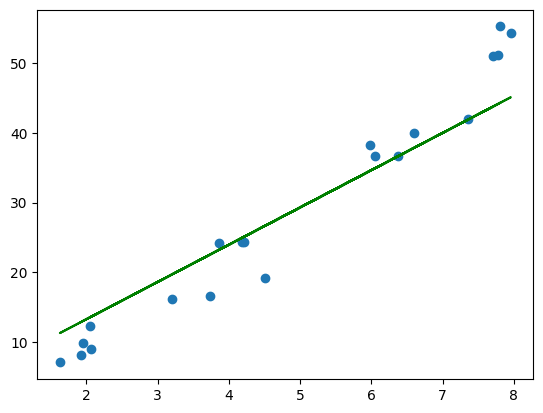

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, model.predict(X_test),'g')

In [ ]:
#performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(Y_test, Y_pred_test)
mae= mean_absolute_error(Y_test, Y_pred_test)
rmse = np.sqrt(mse)
print("Mean squared error: ",mse)
print("Root mean squared error: ",rmse)
print("Mean absolute error: ", mae)

Mean squared error:  25.23674562363223
Root mean squared error:  5.023618777697232
Mean absolute error:  3.9689515350594236


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_pred_test)
print("R-squared score: ", score * 100, '%')

R-squared score:  90.40228286990538 %


In [ ]:
adjusted_r2_score = 1-(1-score) * (len(Y_test)-1) / (len(Y_test)-X_test.shape[1]-1)
print("Adjusted R2 score: ", adjusted_r2_score*100,'%')

Adjusted R2 score:  89.86907636267789 %


In [ ]:
#New data set: 9hr
new_data= [[9]]
print("The marks of the student who studied for 9hr is: ", model.predict(new_data))

The marks of the student who studied for 9hr is:  [50.71345929]


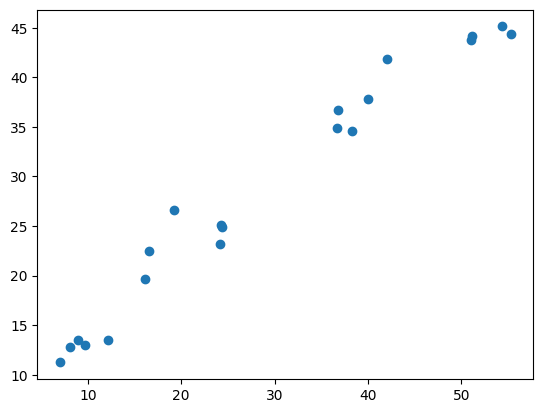

In [ ]:
plt.scatter(Y_test, Y_pred_test)

In [ ]:
residuals = Y_test - Y_pred_test
print(residuals)

83    -3.530528
53     1.743095
70    -5.917047
45    -4.628883
44    -3.237864
39     6.988810
22    -1.290330
80     9.193141
10     0.142755
0     -7.455355
18     7.175550
30     0.963472
73    -4.225384
33     2.136444
90    -0.517520
4     10.953018
76     0.068838
77     3.710835
12    -0.786312
31    -4.713849
Name: Marks, dtype: float64


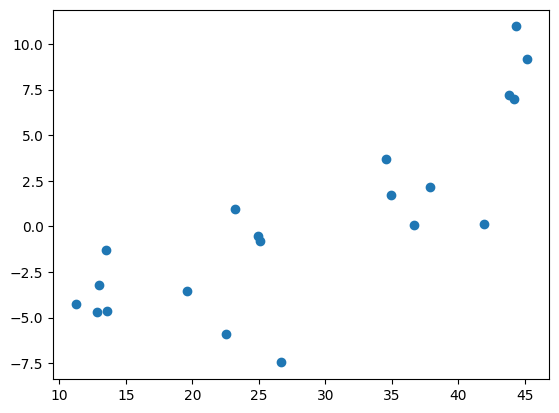

In [ ]:
## Scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(Y_pred_test, residuals)